In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
!echo $CUDA_VISIBLE_DEVICES

1


In [2]:
!nvidia-smi

Tue Apr 11 08:27:27 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 2080 Ti      On | 00000000:17:00.0 Off |                  N/A |
| 22%   29C    P8               22W / 250W|      1MiB / 11264MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [3]:
import sys
sys.path.insert(0, "../")

import os
os.chdir("../")

In [4]:
problems = ["dw4", "lj13", "qm9"]
problem = problems[0]
if problem == "dw4":
    dim = 2
    n_nodes = 4
    from examples.dw4_fab import *
    import target.double_well as dw4
    target_log_prob_fn = dw4.log_prob_fn
    load_dataset = load_dataset_original
# elif problem == "lj13":
#     dim = 3
#     n_nodes = 13
#     from examples.lj13 import *
#     import target.leonard_jones as lj13
#     target_log_prob_fn = lj13.log_prob_fn
# else:
#     dim = 3
#     n_nodes = 19
#     from examples.qm9 import *
#     target_log_prob_fn = None

/scratch/lim24/molecule-bolierplate/molboil/train/train.py:6: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm
/scratch/lim24/miniconda/envs/jax/lib/python3.9/site-packages/flax/core/frozen_dict.py:169: FutureWarning: jax.tree_util.register_keypaths is deprecated, and will be removed in a future release. Please use `register_pytree_with_keys()` instead.
  jax.tree_util.register_keypaths(
/scratch/lim24/augmented-equivariant-flows/examples/dw4_fab.py:64: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  @hydra.main(config_path="./config", config_name="dw4_fab.yaml")


In [5]:
import yaml
import jax
import matplotlib.pyplot as plt

In [6]:
USE_64_BIT = False
if USE_64_BIT:
    from jax.config import config
    config.update("jax_enable_x64", True)

In [7]:
cfg = DictConfig(yaml.safe_load(open(f"examples/config/{problem}_fab.yaml")))
cfg

{'hydra': {'job': {'chdir': False}}, 'fab': {'use_hmc': False, 'transition_operator': {'hmc': {'n_outer_steps': 1, 'init_step_size': '1e-3', 'target_p_accept': 0.65, 'tune_step_size': True}, 'metropolis': {'n_outer_steps': 1, 'init_step_size': 1.0}}, 'alpha': 2.0, 'n_intermediate_distributions': 4, 'spacing_type': 'linear'}, 'target': {'aux': {'global_centering': False, 'scale_init': 1.0, 'trainable_augmented_scale': False}, 'custom_samples': False, 'temperature': 0.1}, 'flow': {'base': {'train_x_scale': True, 'x_scale_init': 1.0, 'aux': {'global_centering': False, 'scale_init': '${target.aux.scale_init}', 'trainable_augmented_scale': True}}, 'dim': 2, 'nodes': 4, 'n_aug': 5, 'n_layers': 4, 'act_norm': True, 'identity_init': True, 'type': 'spherical', 'kwargs': {'spherical': {'n_inner_transforms': 1, 'dist_spline_max': 10.0, 'spline_num_bins': 8}, 'proj': {'transform_type': 'spline', 'n_inner_transforms': 1, 'origin_on_coupled_pair': False, 'num_bins': 8, 'lower': -2.0, 'upper': 2.0}},

# Train

In [8]:
cfg.training.save = False
cfg.logger = DictConfig({"list_logger": None})
cfg.flow.act_norm = False

In [15]:
# Flow setup
cfg.flow.n_aug = 1
cfg.flow.type = 'spherical'
cfg.flow.n_layers = 4

# AIS setup
cfg.fab.transition_operator.metropolis.init_step_size = 0.2

In [16]:
# Training setup.
cfg.training.optimizer.use_schedule = False
cfg.training.optimizer.init_lr = 2e-4
cfg.training.optimizer.max_global_norm = 1.0
cfg.training.n_epoch = int(1000)
cfg.training.batch_size = 1000

creating flow of type spherical


  0%|                                                  | 0/1000 [00:00<?, ?it/s]

graph features has no batch size
graph features has no batch size
non numeric history values being saved


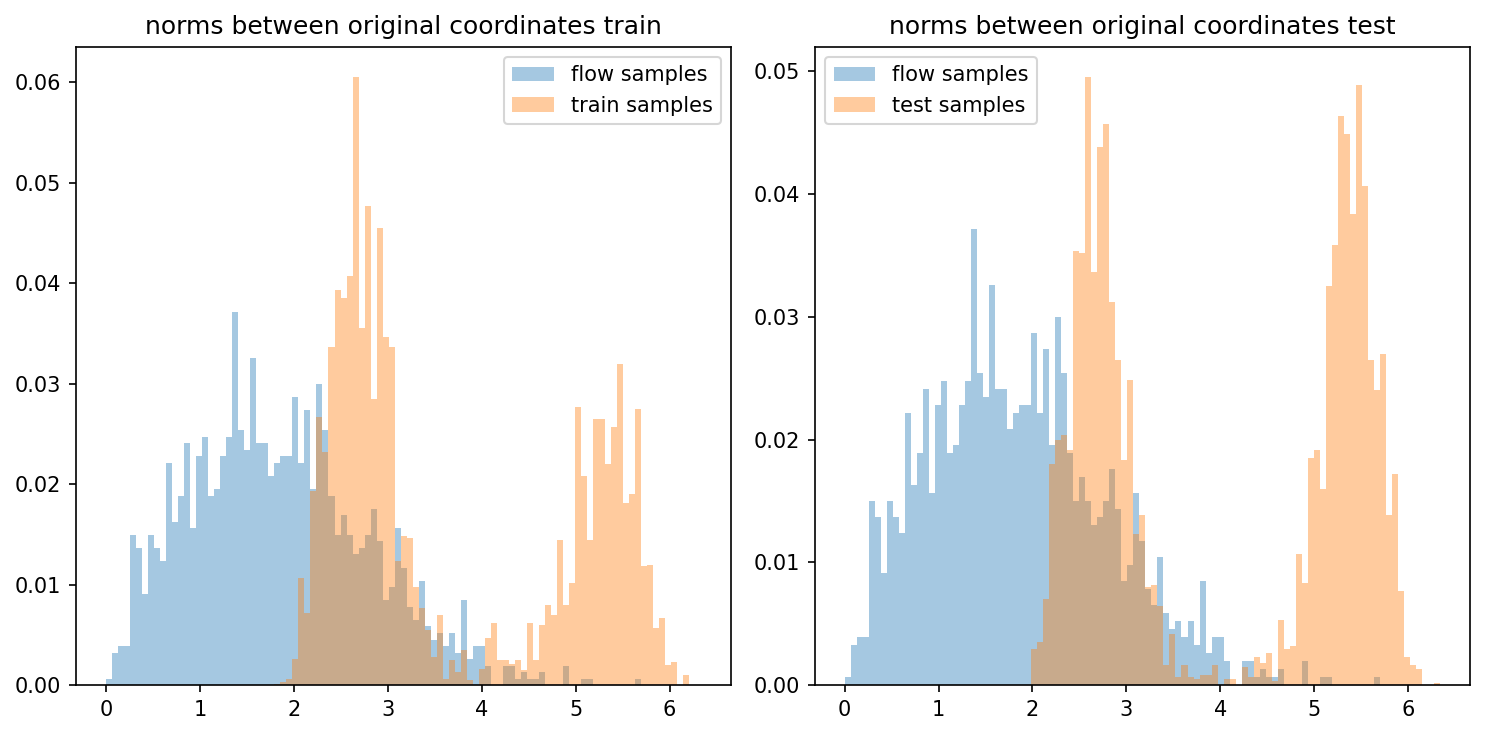

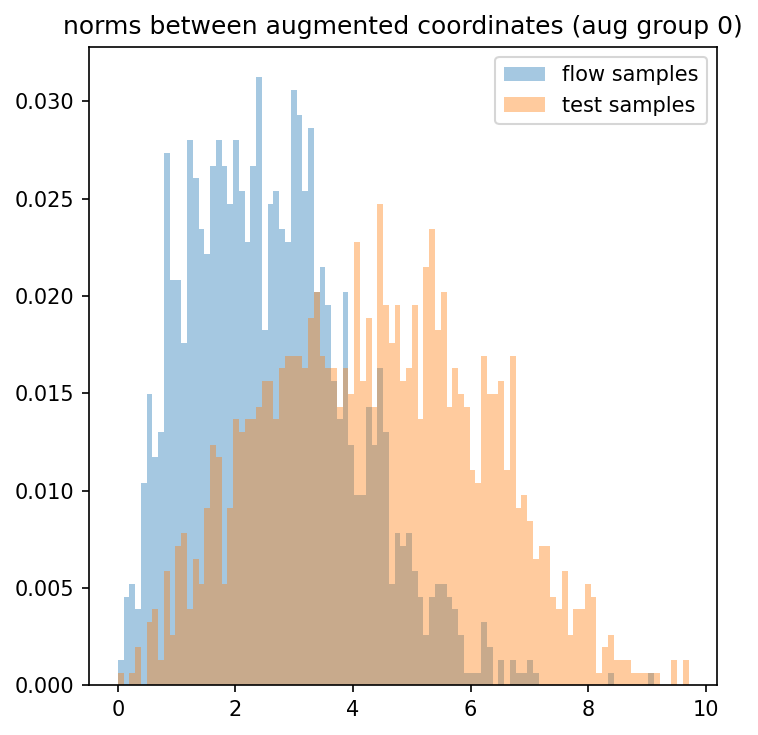

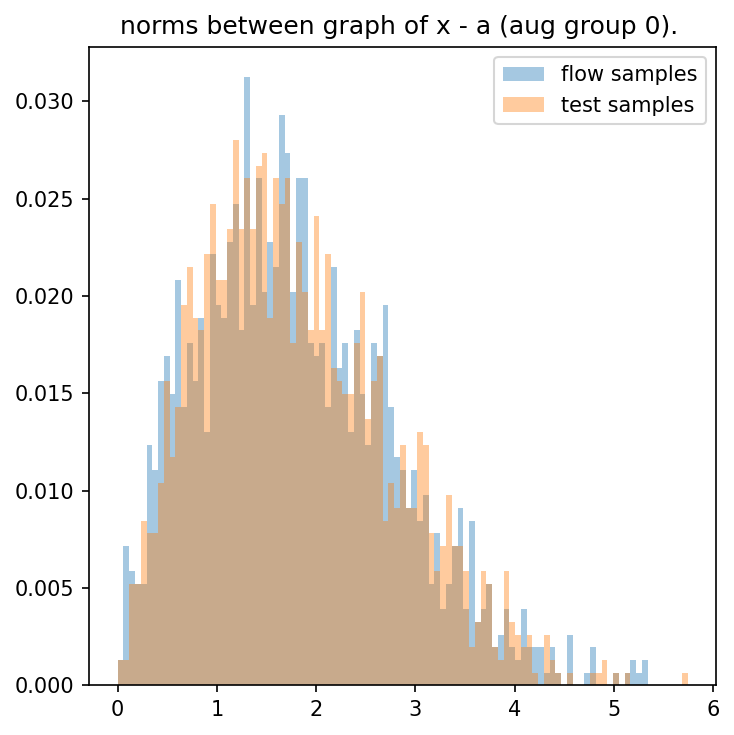

  0%|                                        | 3/1000 [02:06<9:06:44, 32.90s/it]

{'ess_marginal': Array(0.9975866, dtype=float32), 'eval_log_lik': Array(-30.529106, dtype=float32), 'marginal_log_lik': Array(-19.16817, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(2.7520317e-05, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(4.7045096e-06, dtype=float32), 'var_log_w': Array(0.00235239, dtype=float32), 'iteration': 0}


 11%|████▍                                   | 111/1000 [02:15<01:09, 12.82it/s]

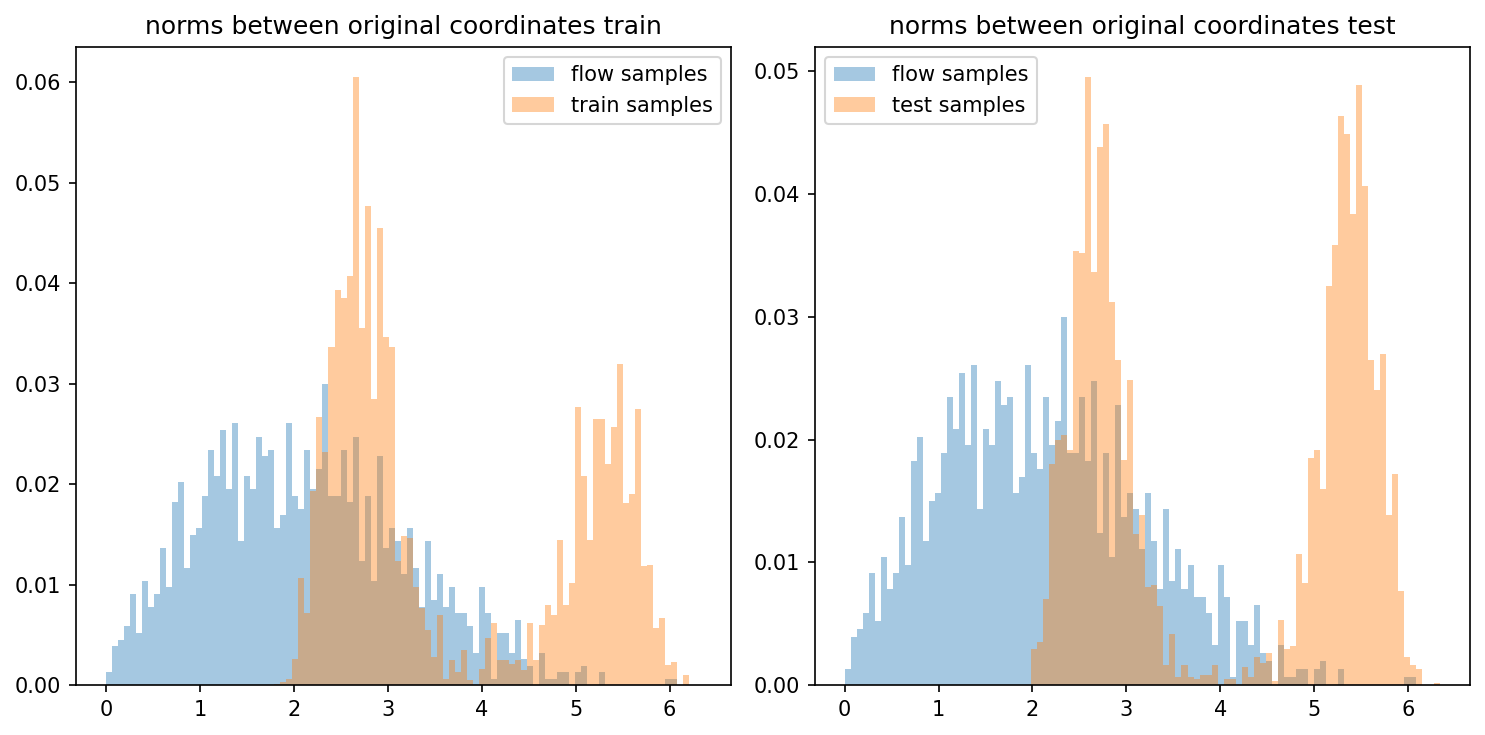

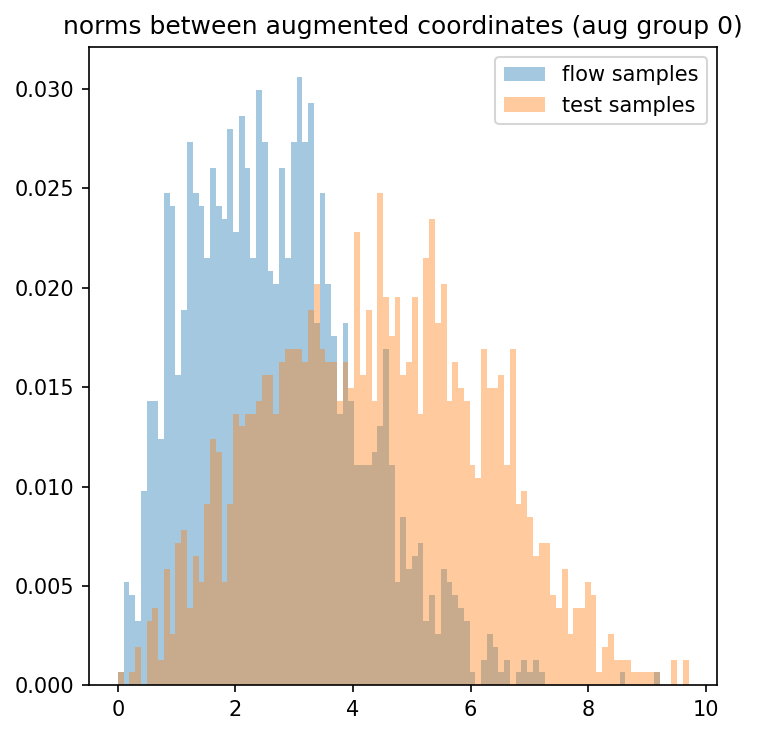

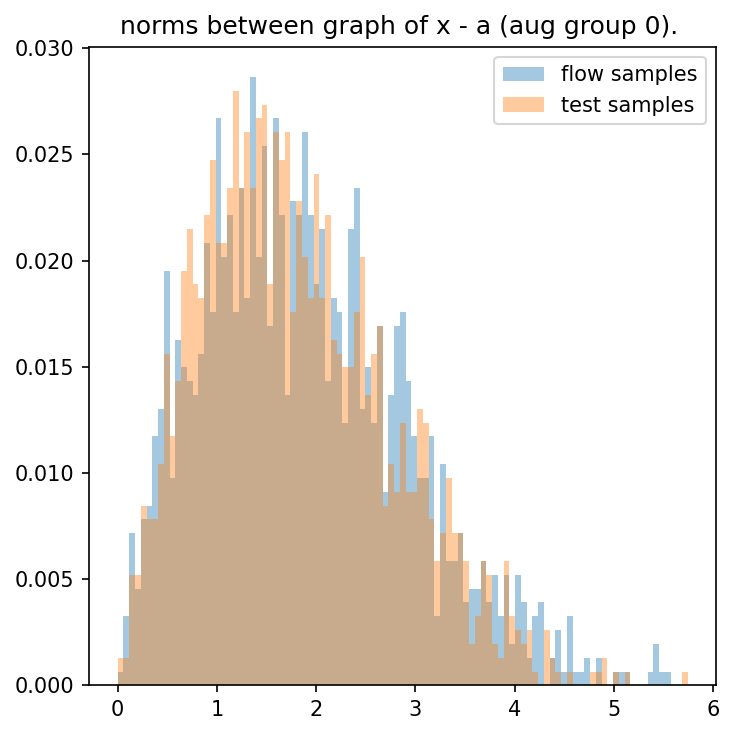

 11%|████▌                                   | 113/1000 [02:16<02:52,  5.15it/s]

{'ess_marginal': Array(0.42156538, dtype=float32), 'eval_log_lik': Array(-29.1164, dtype=float32), 'marginal_log_lik': Array(-17.173328, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00020681, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(9.076936e-06, dtype=float32), 'var_log_w': Array(1.1179869, dtype=float32), 'iteration': 111}


 22%|████████▊                               | 221/1000 [02:24<01:01, 12.77it/s]

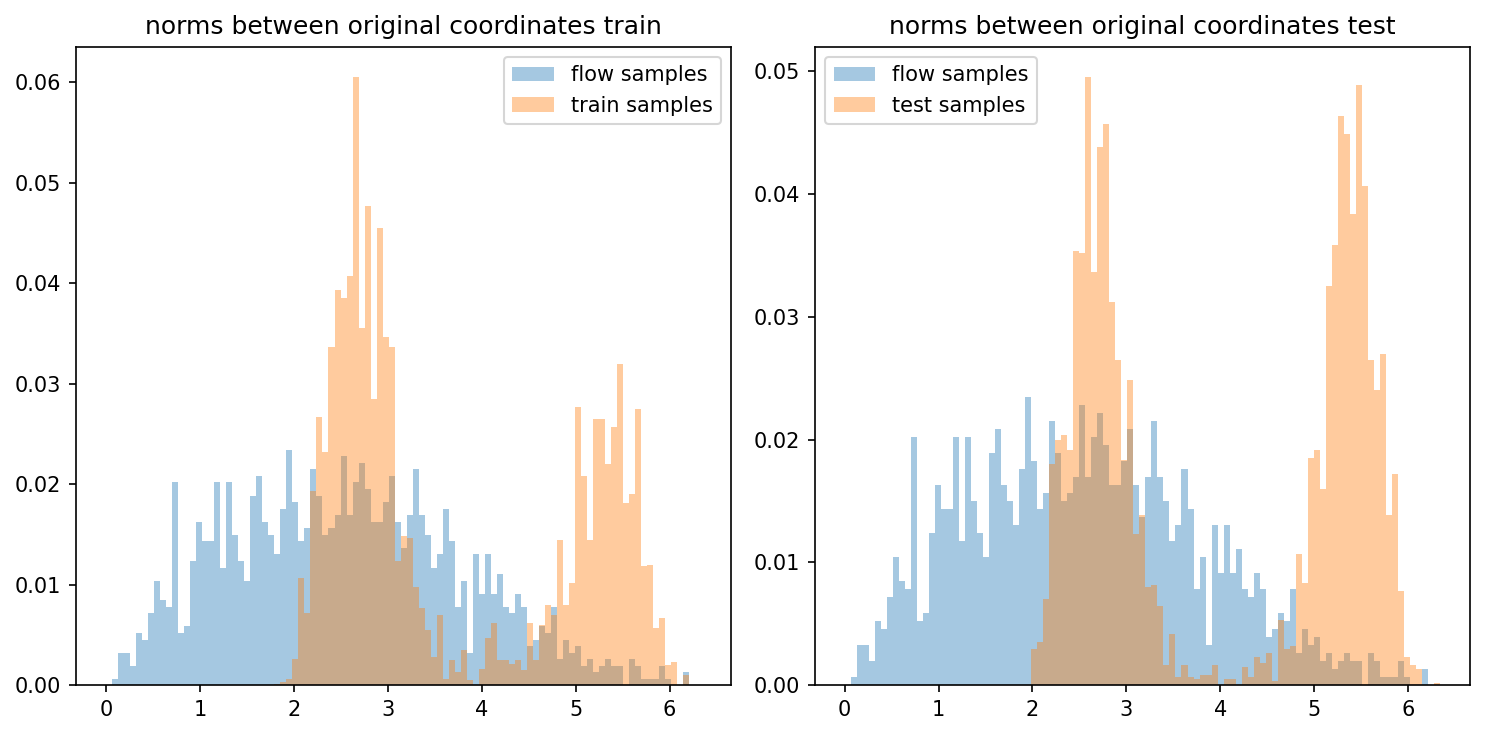

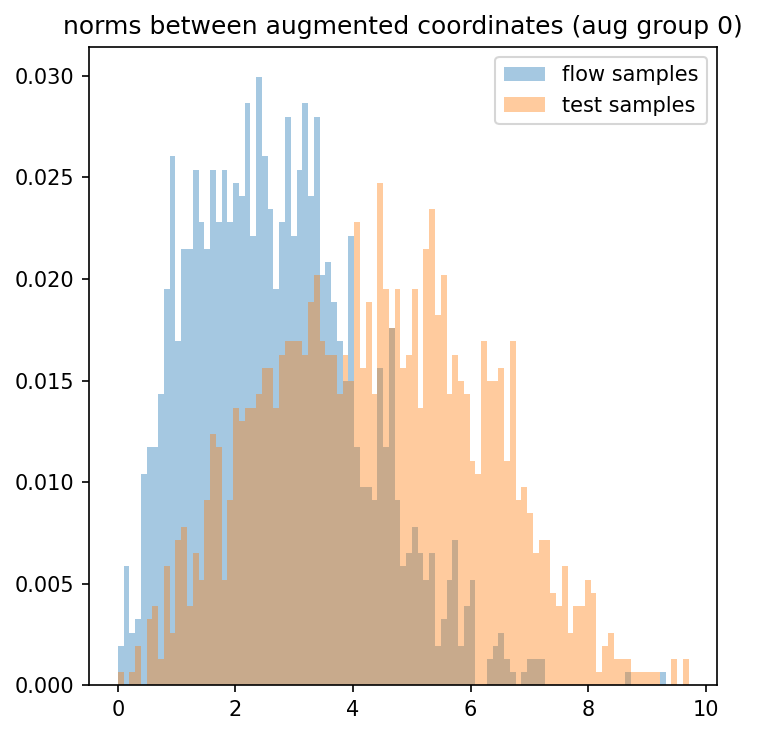

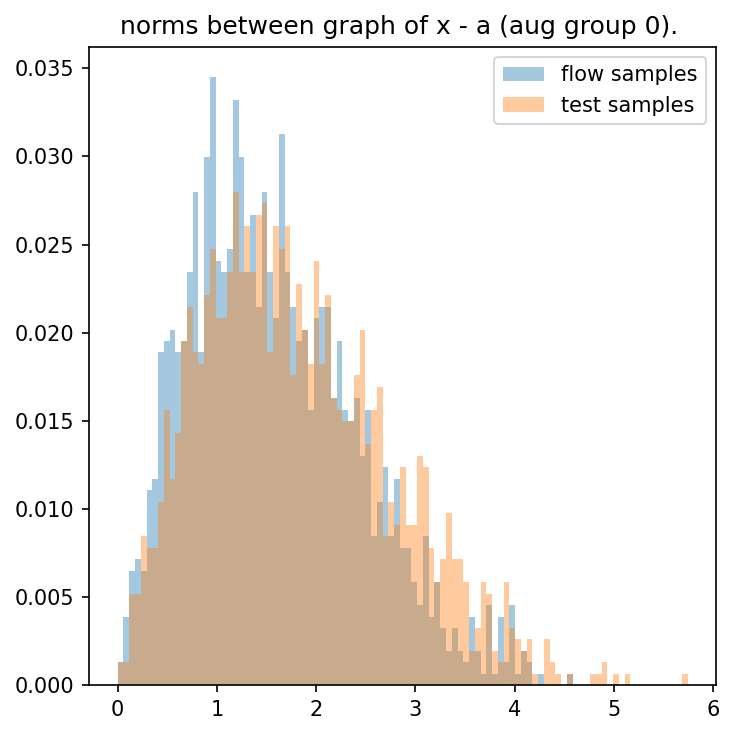

 22%|█████████                               | 225/1000 [02:25<02:02,  6.31it/s]

{'ess_marginal': Array(0.3219026, dtype=float32), 'eval_log_lik': Array(-27.488037, dtype=float32), 'marginal_log_lik': Array(-15.090455, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00035749, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.404196e-05, dtype=float32), 'var_log_w': Array(2.5350215, dtype=float32), 'iteration': 222}


 33%|█████████████▎                          | 333/1000 [02:34<00:52, 12.79it/s]

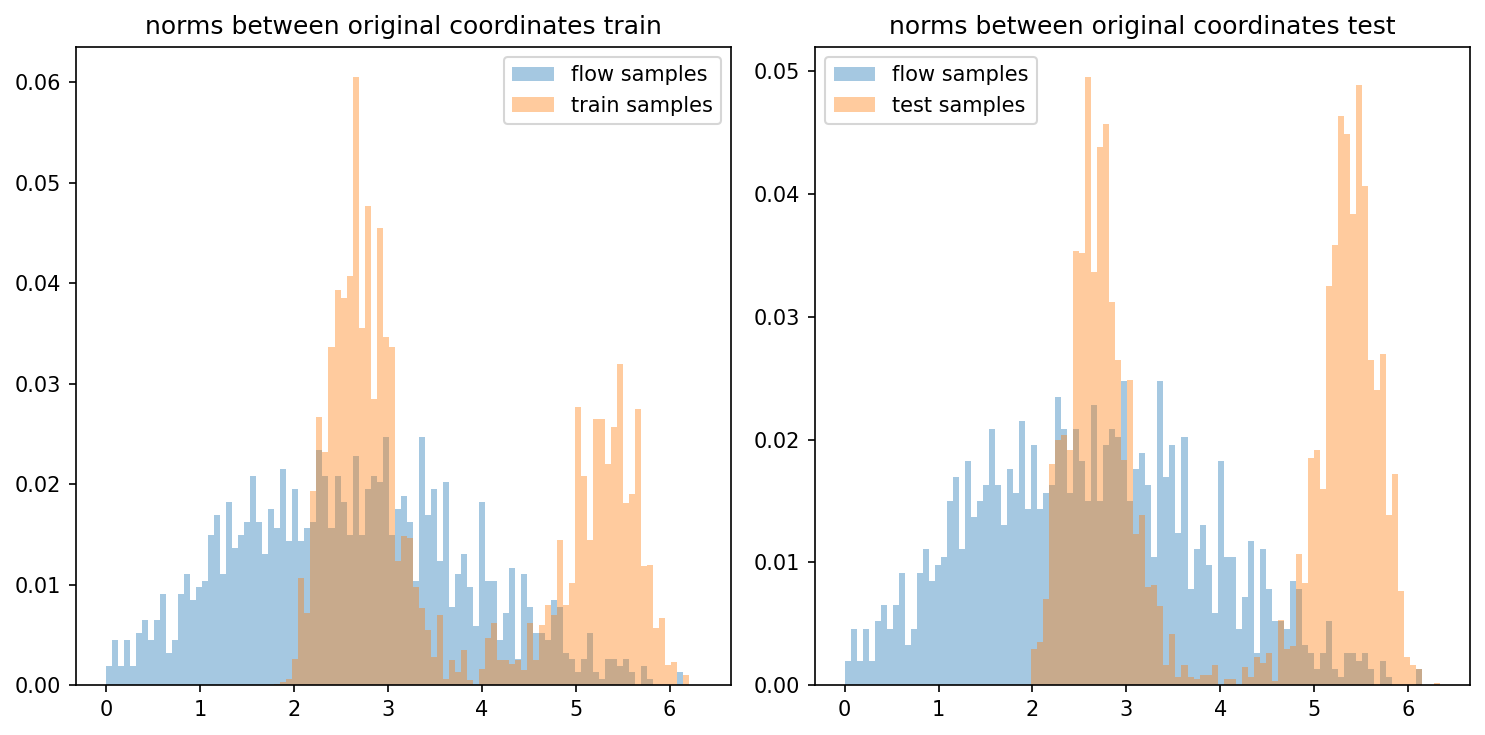

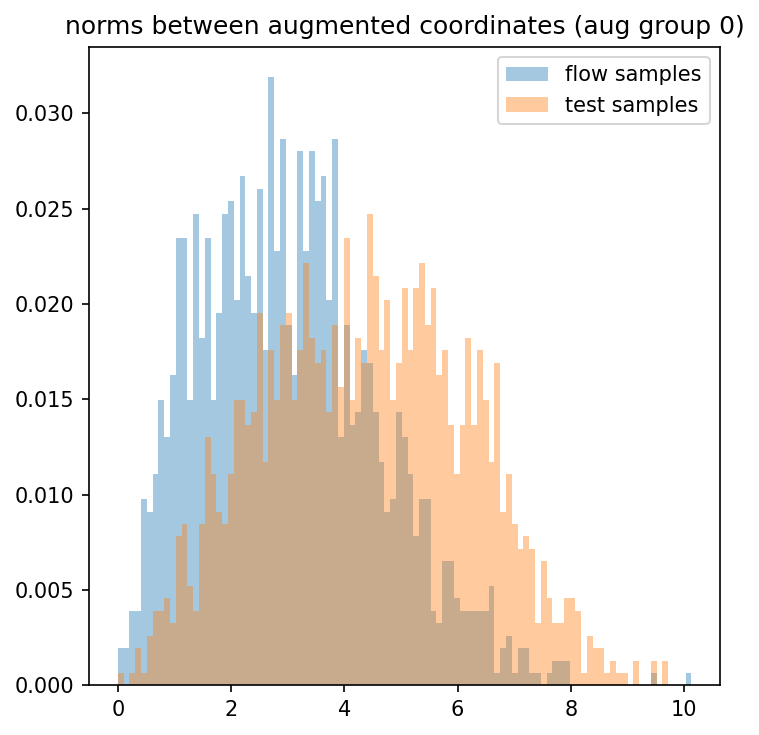

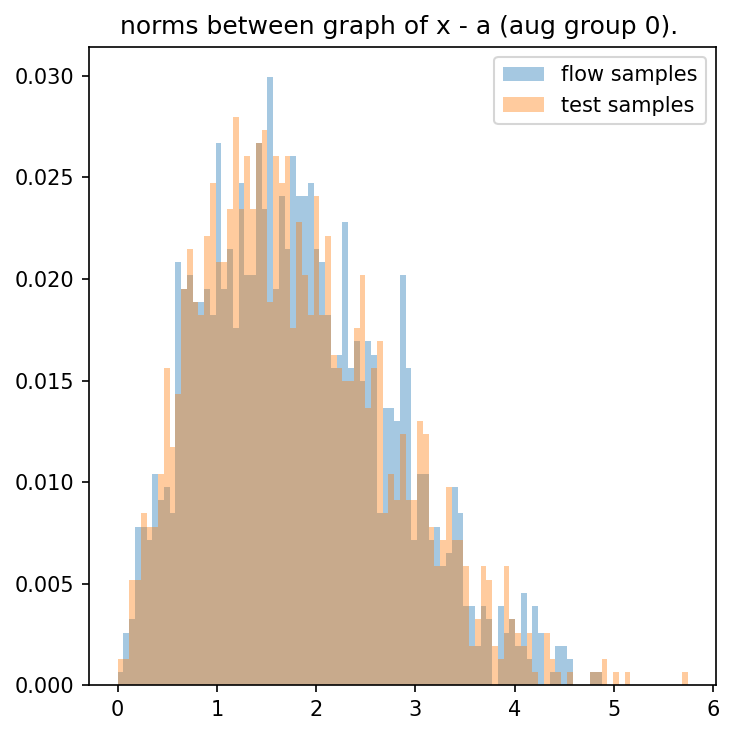

 34%|█████████████▍                          | 335/1000 [02:35<02:07,  5.23it/s]

{'ess_marginal': Array(0.26576254, dtype=float32), 'eval_log_lik': Array(-28.646603, dtype=float32), 'marginal_log_lik': Array(-15.871198, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00032071, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(3.1137042e-05, dtype=float32), 'var_log_w': Array(3.3305542, dtype=float32), 'iteration': 333}


 44%|█████████████████▋                      | 443/1000 [02:43<00:43, 12.83it/s]

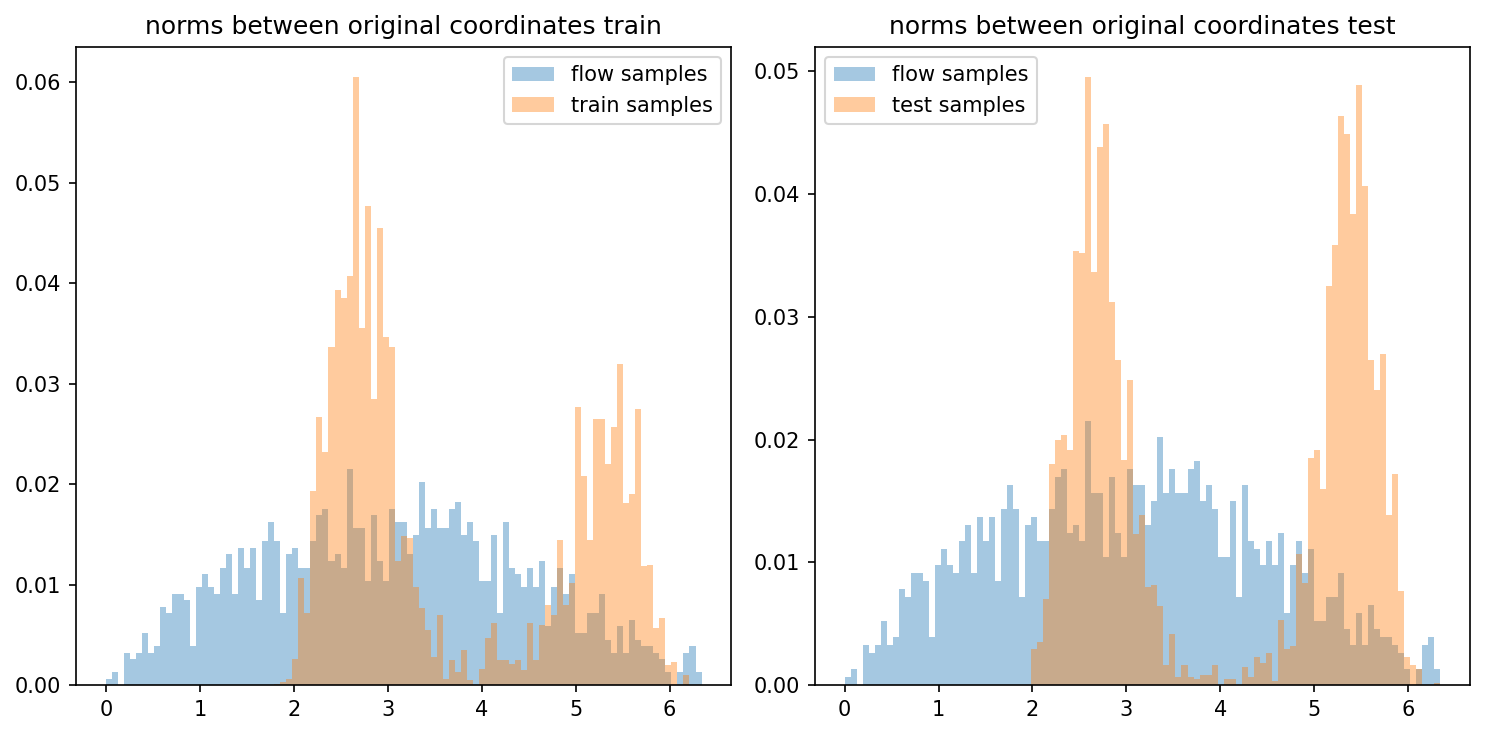

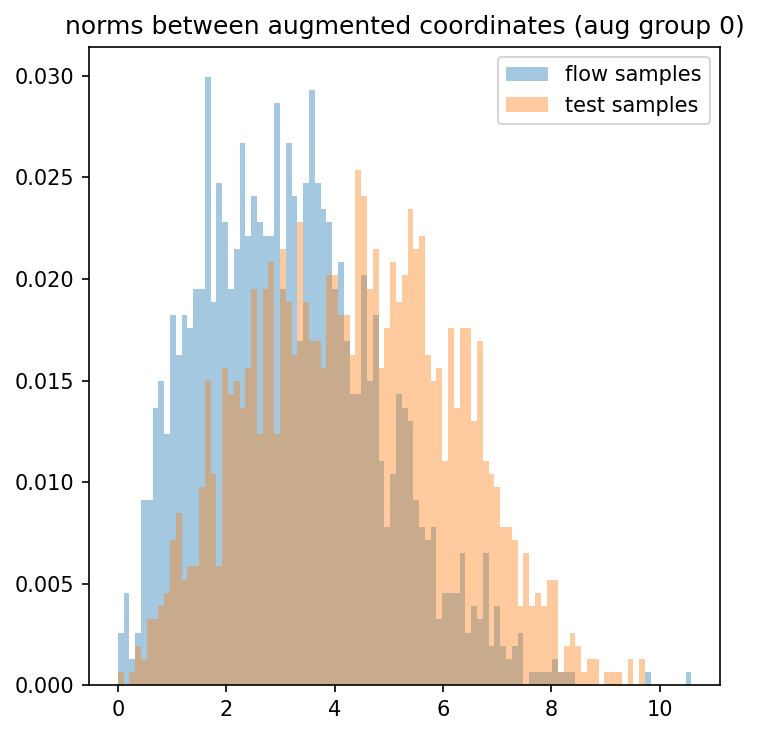

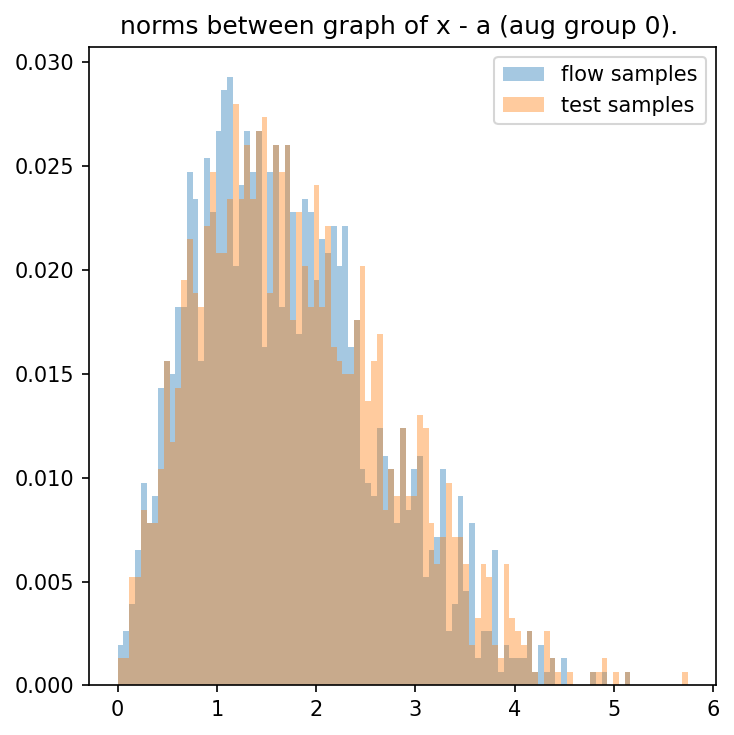

 45%|█████████████████▉                      | 447/1000 [02:44<01:29,  6.20it/s]

{'ess_marginal': Array(0.3291435, dtype=float32), 'eval_log_lik': Array(-26.339727, dtype=float32), 'marginal_log_lik': Array(-13.750401, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00026703, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.195154e-05, dtype=float32), 'var_log_w': Array(3.4512894, dtype=float32), 'iteration': 444}


 56%|██████████████████████▏                 | 555/1000 [02:53<00:34, 12.80it/s]

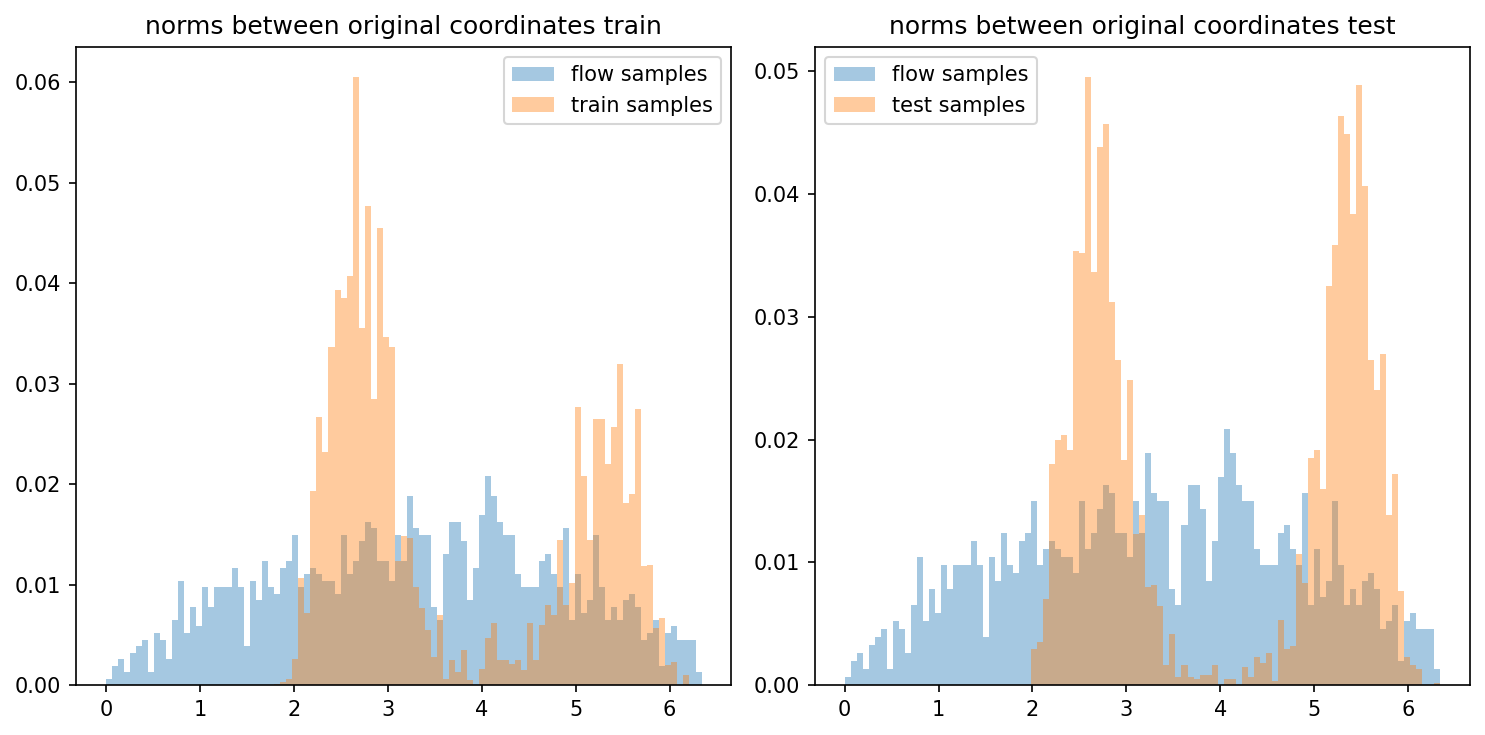

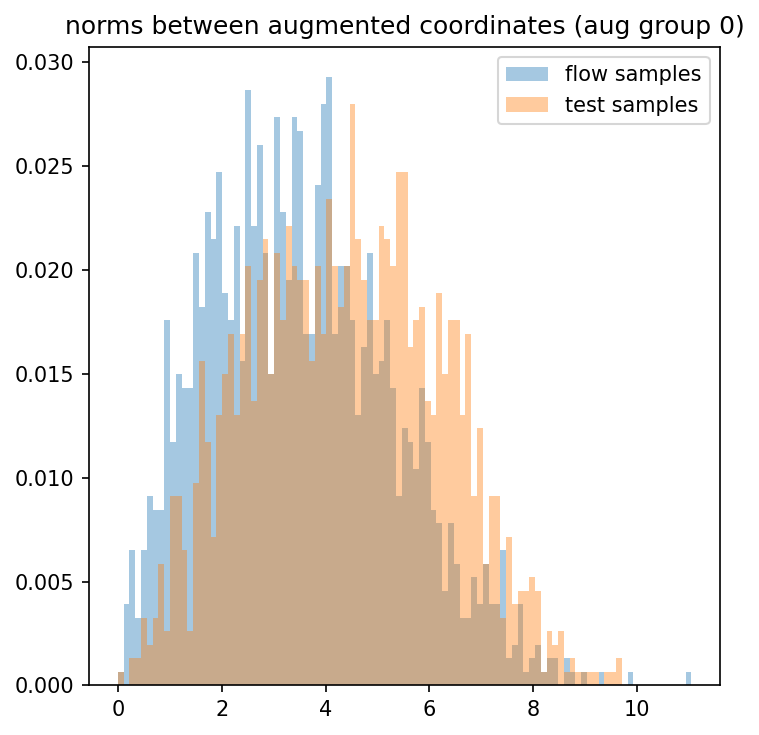

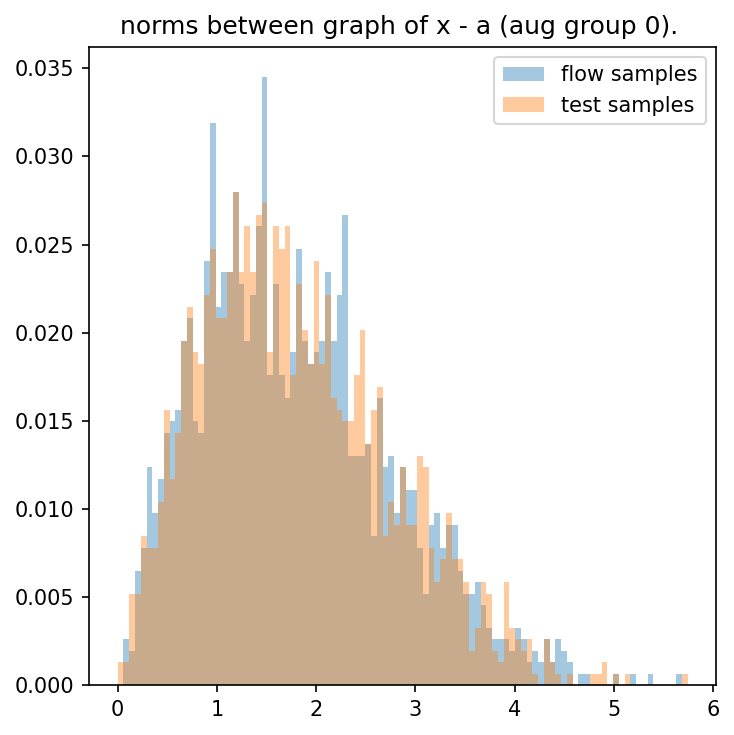

 56%|██████████████████████▎                 | 557/1000 [02:54<01:25,  5.16it/s]

{'ess_marginal': Array(0.34906736, dtype=float32), 'eval_log_lik': Array(-25.620216, dtype=float32), 'marginal_log_lik': Array(-13.23979, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00021444, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.1670547e-05, dtype=float32), 'var_log_w': Array(2.8452368, dtype=float32), 'iteration': 555}


 66%|██████████████████████████▌             | 665/1000 [03:02<00:26, 12.76it/s]

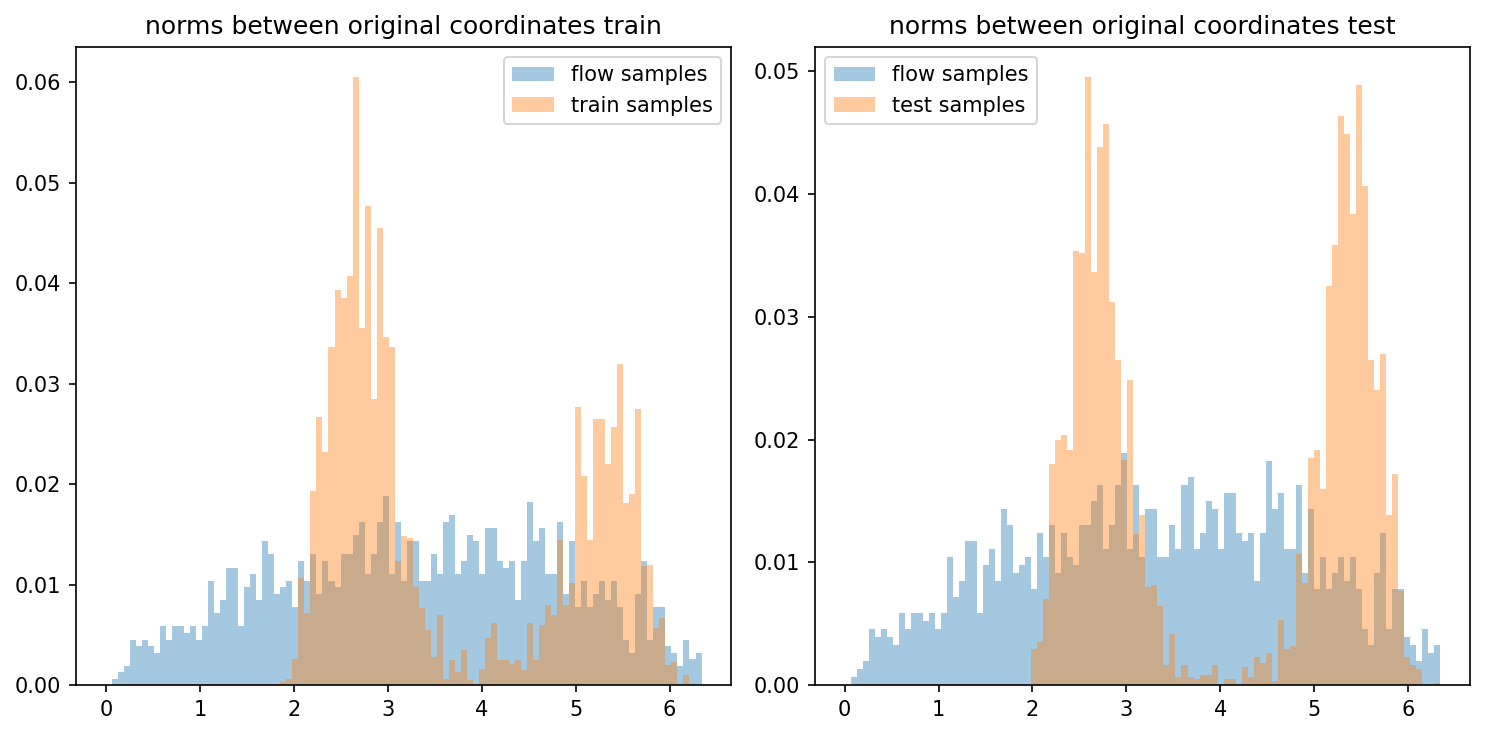

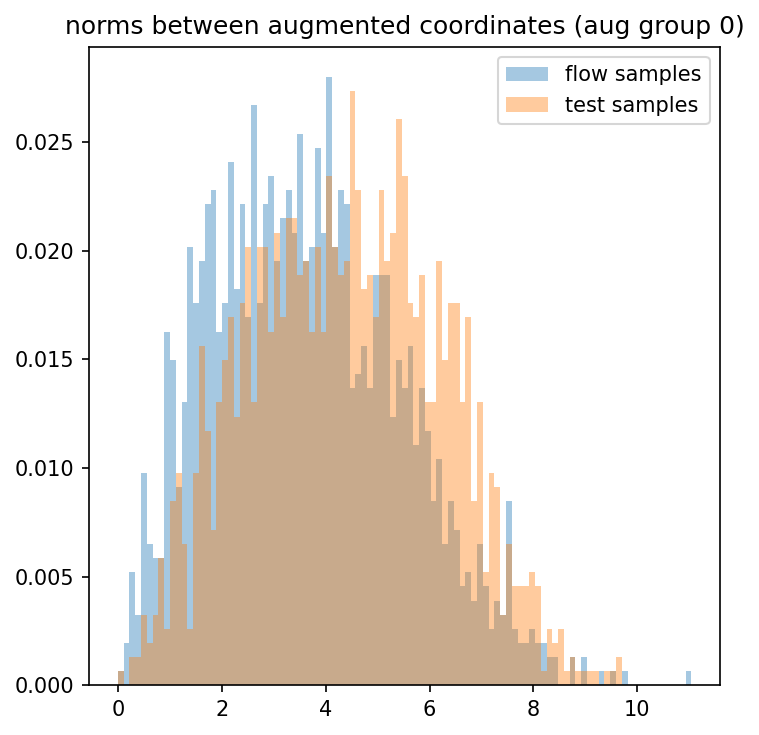

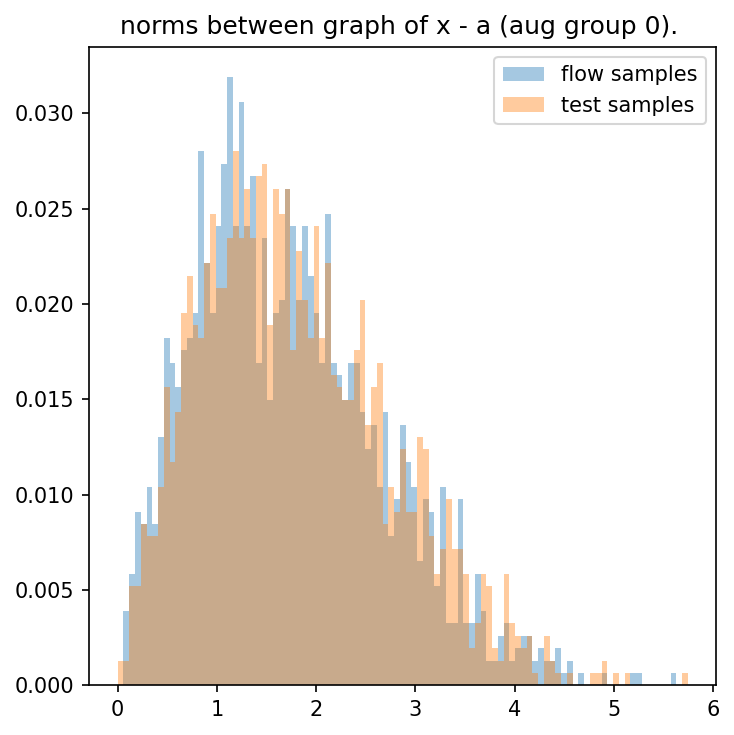

 67%|██████████████████████████▊             | 669/1000 [03:04<00:52,  6.36it/s]

{'ess_marginal': Array(0.36199686, dtype=float32), 'eval_log_lik': Array(-25.544218, dtype=float32), 'marginal_log_lik': Array(-13.126423, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00034523, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.2404962e-05, dtype=float32), 'var_log_w': Array(3.2470198, dtype=float32), 'iteration': 666}


 78%|███████████████████████████████         | 777/1000 [03:12<00:17, 12.74it/s]

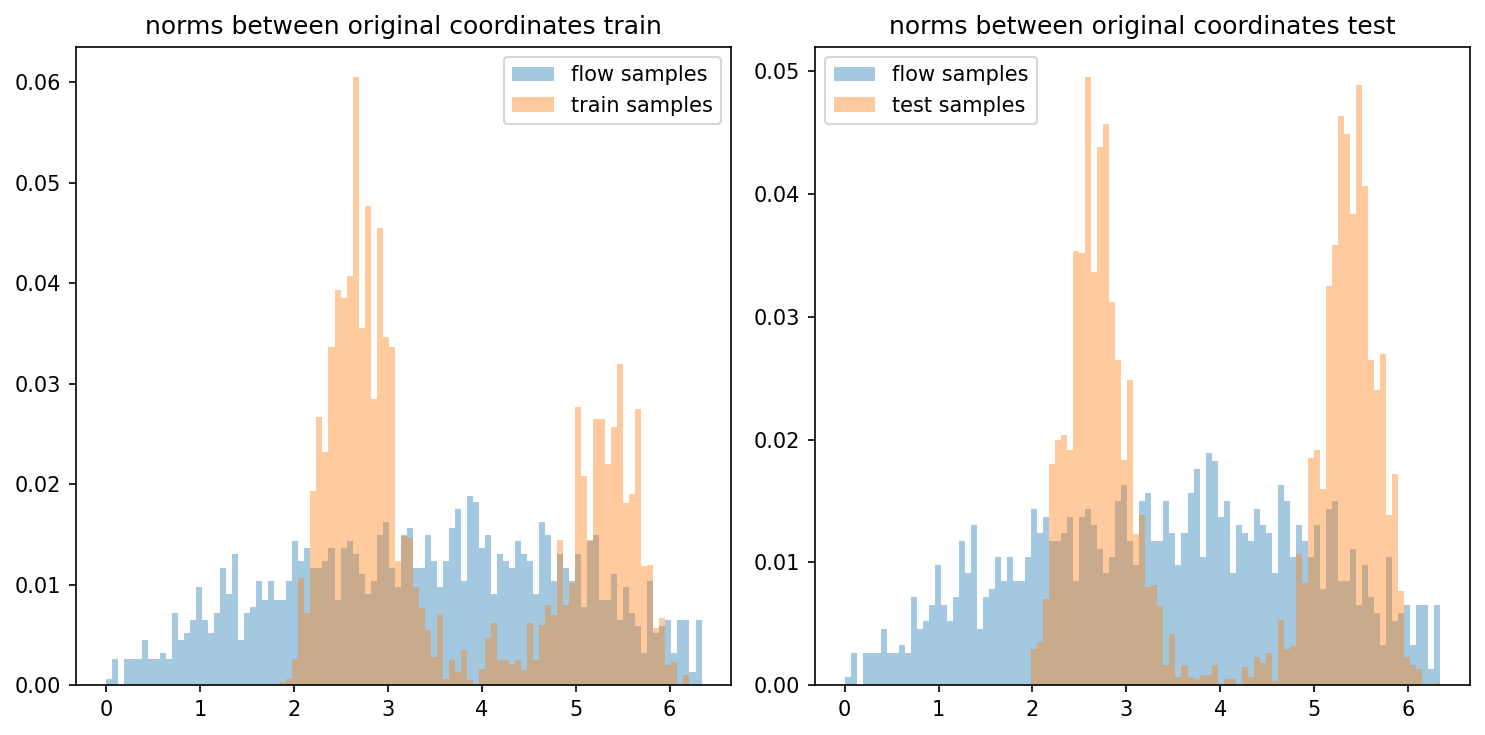

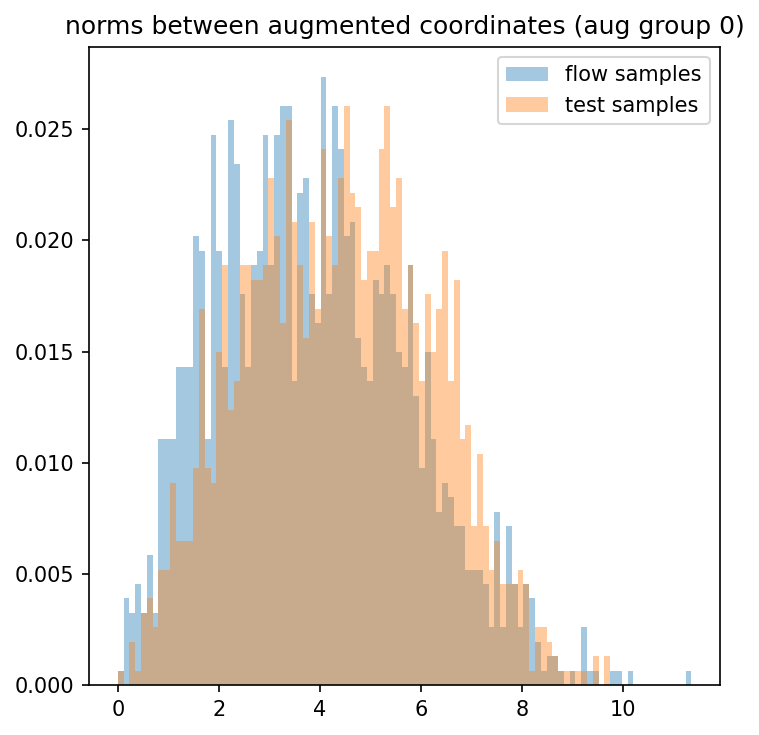

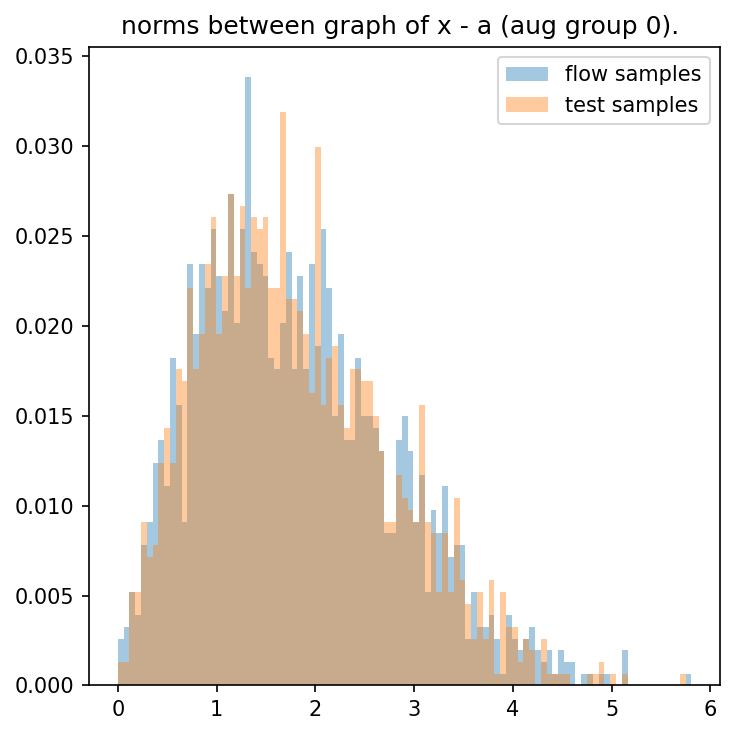

 78%|███████████████████████████████▏        | 779/1000 [03:13<00:42,  5.19it/s]

{'ess_marginal': Array(0.38429216, dtype=float32), 'eval_log_lik': Array(-25.283882, dtype=float32), 'marginal_log_lik': Array(-12.929157, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00029128, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.1928125e-05, dtype=float32), 'var_log_w': Array(3.0376573, dtype=float32), 'iteration': 777}


 89%|███████████████████████████████████▍    | 887/1000 [03:21<00:08, 12.70it/s]

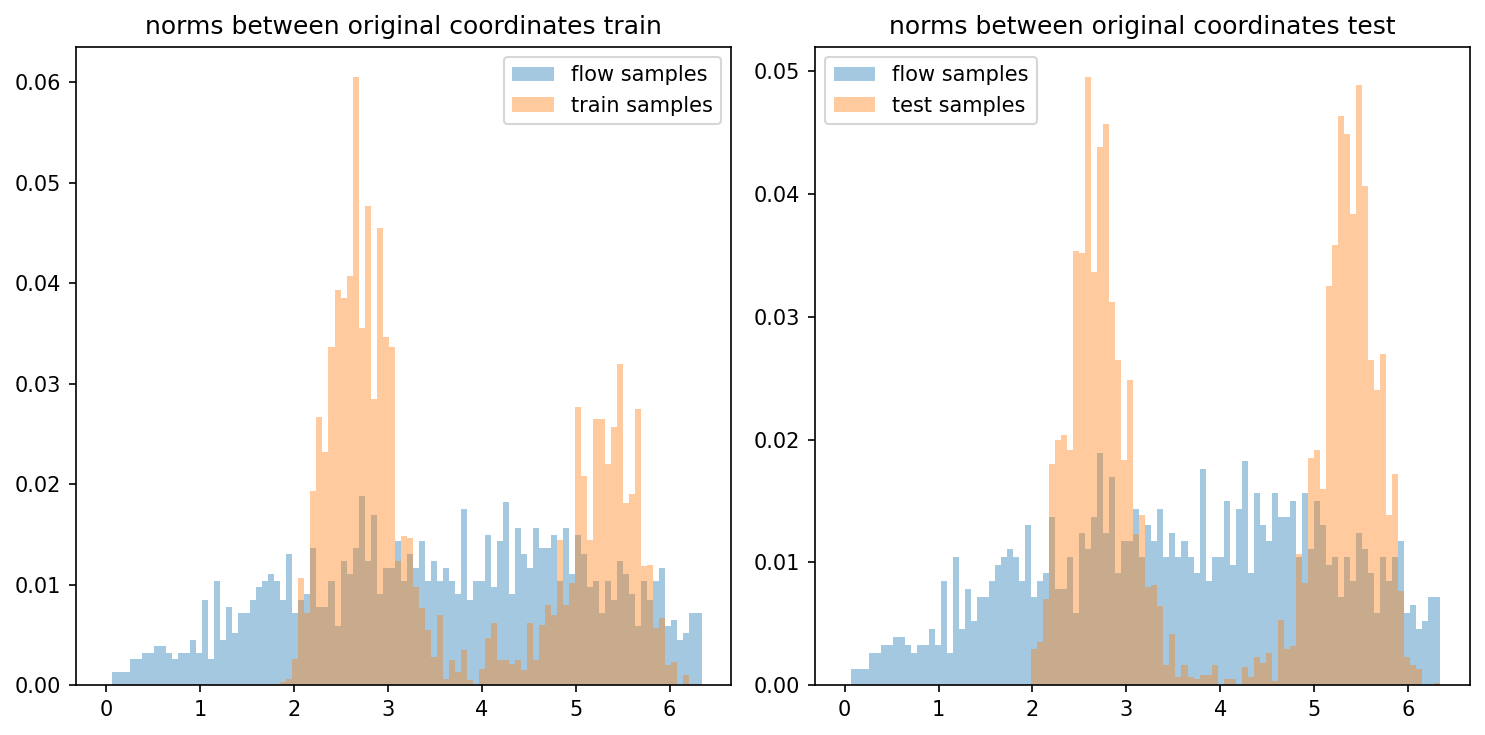

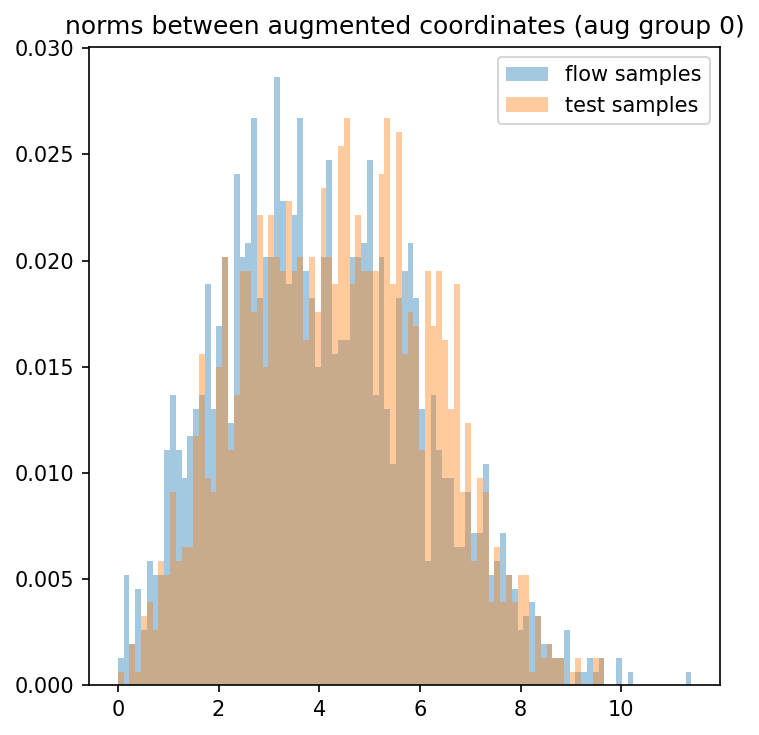

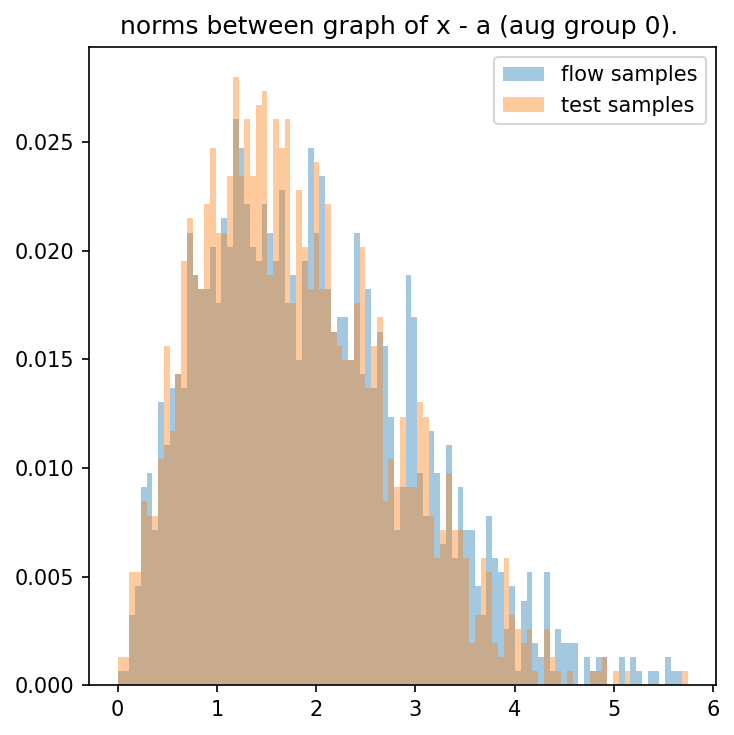

 89%|███████████████████████████████████▋    | 891/1000 [03:23<00:17,  6.36it/s]

{'ess_marginal': Array(0.3729905, dtype=float32), 'eval_log_lik': Array(-25.151144, dtype=float32), 'marginal_log_lik': Array(-12.923675, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00025885, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(2.1828073e-05, dtype=float32), 'var_log_w': Array(2.3765247, dtype=float32), 'iteration': 888}


100%|███████████████████████████████████████▉| 999/1000 [03:31<00:00, 12.72it/s]

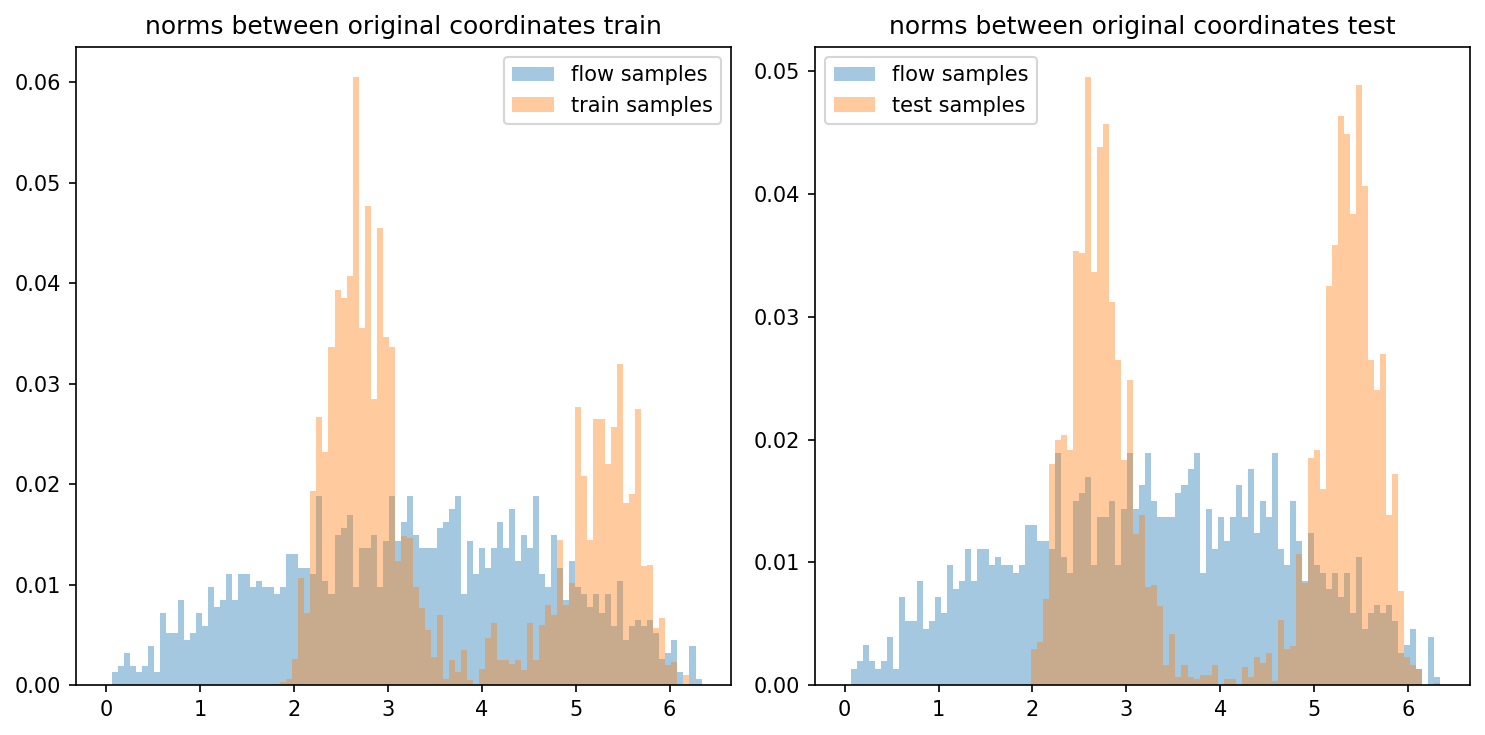

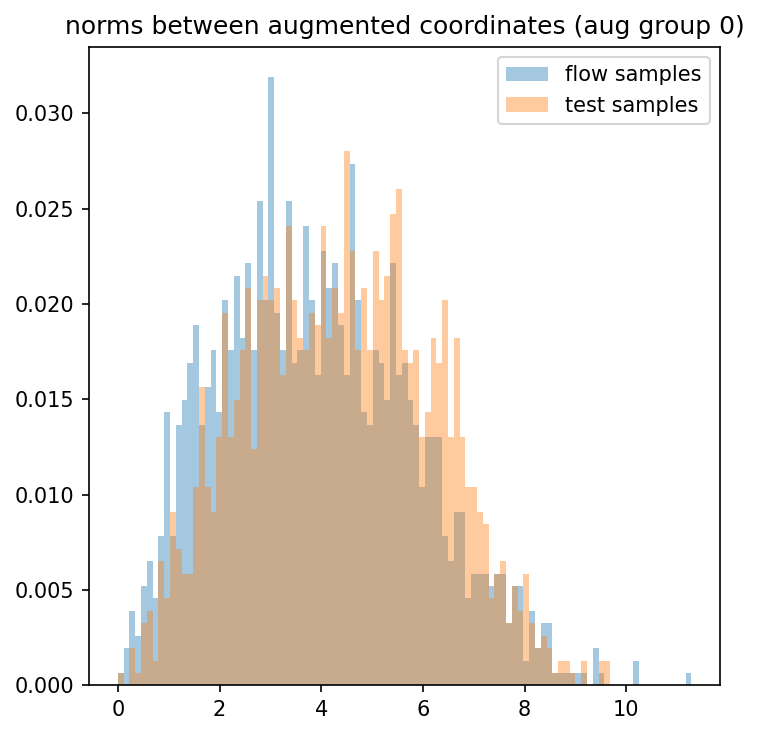

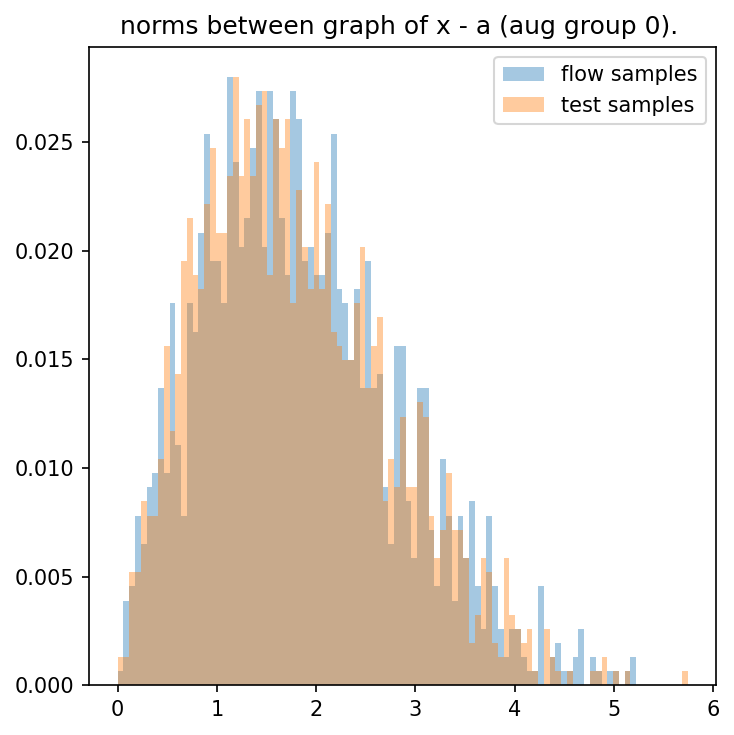

100%|███████████████████████████████████████| 1000/1000 [03:32<00:00,  4.71it/s]


{'ess_marginal': Array(0.3387068, dtype=float32), 'eval_log_lik': Array(-25.625261, dtype=float32), 'marginal_log_lik': Array(-13.145491, dtype=float32), 'max_abs_diff_log_prob_after_group_action': Array(0.00020572, dtype=float32), 'mean_abs_diff_log_prob_after_group_action': Array(1.7774957e-05, dtype=float32), 'var_log_w': Array(3.1406312, dtype=float32), 'iteration': 999}


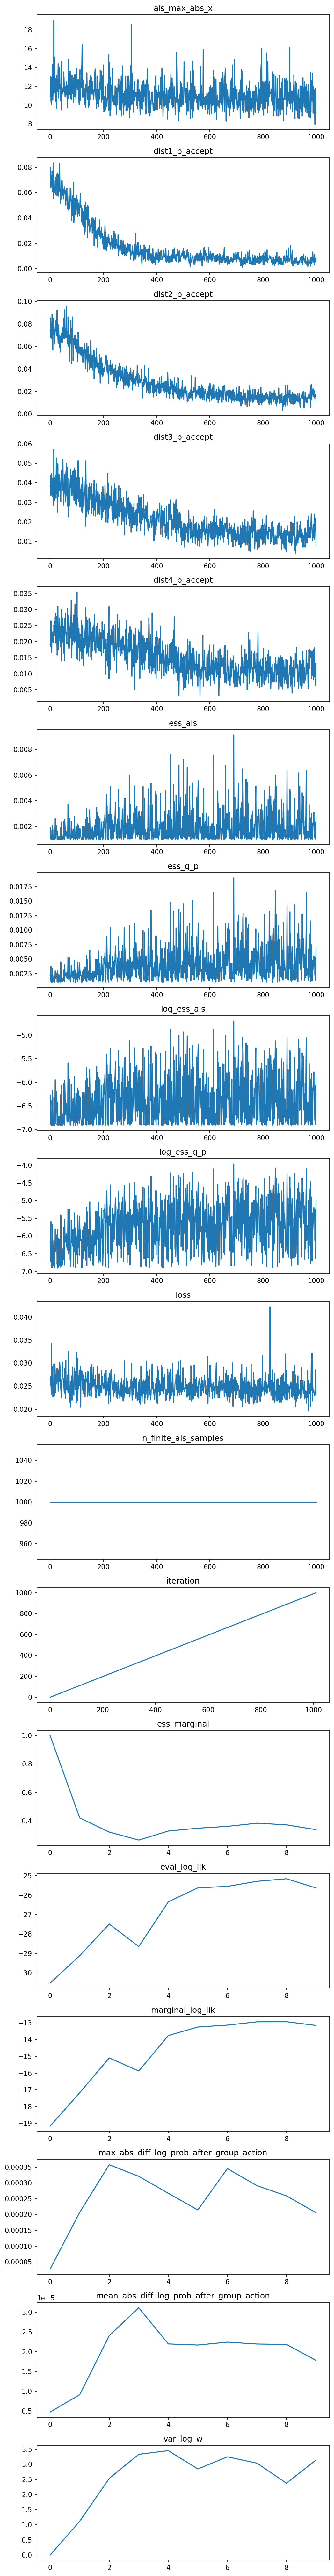

In [17]:
experiment_config = create_train_config(cfg, dim=dim, n_nodes=n_nodes, target_log_p_x_fn=log_prob_fn,
                                        load_dataset=load_dataset)

logger, state = train(experiment_config)

# 